### Librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from termStructureCER import data

#### Construcción de Modelos
- Modelo Nelson-Siegel
- Modelo Nelson-Siegel-Svensson
- Estructuras de tasas Spot

Parámetros Nelson-Siegel [8.647282272026706, -10.791382350846614, 0.0031655159879771314, 1.3739462038928536]
Parámetros Nelson-Siegel-Svensson [15.398302597673089, -54.06175795485707, 10.365968788438627, -6.232841850099414, 0.4655422789014442, 1.8670545026163459]


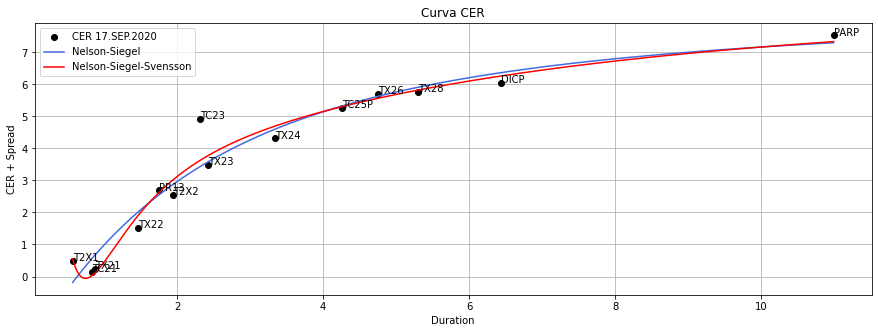

In [2]:
def NelsonSiegel(T,b0,b1,b2,t1):
    return b0+(b1+b2)*t1/T*(1-np.exp(-T/t1))-b2*np.exp(-T/t1)

def NelsonSiegelSvensson(T,b0,b1,b2,b3,t1,t2):
    return b0+(b1+b2)*(t1/T)*(1-np.exp(-T/t1))-b2*np.exp(-T/t1)+b3*((1-np.exp(-T/t2)/(T/t2))-np.exp(-T/t2))

def Comparador():
    xdata   = data.timeToMaturity
    ydata   = data.yieldSep17
    labels  = ["T2X1","TC21","TX21","TX22","PR13","T2X2",
               "TC23","TX23","TX24","TC25P","TX26","TX28","DICP","PARP"]
    
    popt, pcov   = curve_fit(NelsonSiegel,xdata,ydata)
    [b0,b1,b2,t1] = popt
    print("Parámetros Nelson-Siegel",[b0,b1,b2,t1])

    popt_, pcov_ = curve_fit(NelsonSiegelSvensson,xdata,ydata)
    [b0_,b1_,b2_,b3_,t1_,t2_] = popt_
    print("Parámetros Nelson-Siegel-Svensson",[b0_,b1_,b2_,b3_,t1_,t2_])
    
    T = np.linspace(min(xdata),max(xdata),num=1001,endpoint=True)
    
    plt.figure(figsize=(15,5))
    plt.title('Curva CER')
    plt.xlabel('Duration')
    plt.ylabel('CER + Spread')
    plt.grid()
    plt.plot(xdata,ydata,color='black',marker="o",linewidth=0,label='CER 17.SEP.2020')
    plt.plot(T,NelsonSiegel(T,b0,b1,b2,t1),color='royalblue',label='Nelson-Siegel')
    plt.plot(T,NelsonSiegelSvensson(T,b0_,b1_,b2_,b3_,t1_,t2_),color='r',label='Nelson-Siegel-Svensson')
    plt.legend()
    
    for i, txt in enumerate(labels):
        plt.annotate(txt,(xdata[i], ydata[i]))

def main():
    Comparador()
    
if __name__ == "__main__": 
    main()

#### Análisis de sensibilidad para curva Forward
- b0 -> Nivel -> Trayectoria de la tasa larga
- b1 -> Pendiente -> Premio por plazo
- b2 -> Curvatura

#### Análisis $\beta_0$

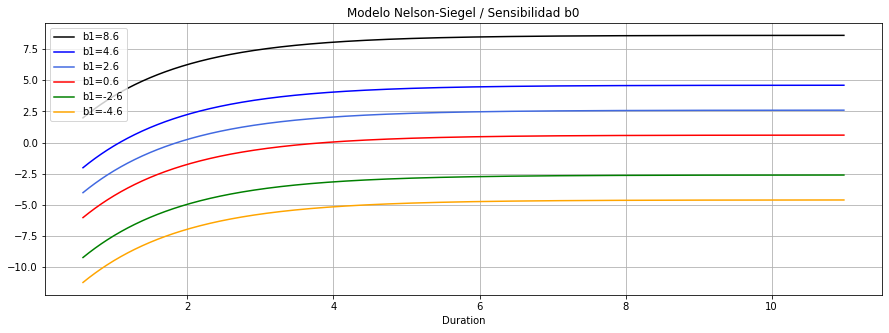

In [3]:
def NelsonSiegelForward(T,b0,b1,b2,t1):
    return b0 + (b1+b2*T) * np.exp(-T/t1)
           
def plotNelsonSiegel():
    xdata   = data.timeToMaturity
    ydata   = data.yieldSep17
    T       = np.linspace(min(xdata),max(xdata),num=1001,endpoint=True)
    
    plt.figure(figsize=(15,5))
    plt.title('Modelo Nelson-Siegel / Sensibilidad b0')
    plt.xlabel('Duration')
    plt.ylabel('')
    plt.grid()
    plt.plot(T,NelsonSiegelForward(T,b0=8.6 , b1=-10 ,b2=0.0,t1=1.38),color='black'    ,label='b1=8.6')
    plt.plot(T,NelsonSiegelForward(T,b0=4.6 , b1=-10 ,b2=0.0,t1=1.38),color='blue'     ,label='b1=4.6')
    plt.plot(T,NelsonSiegelForward(T,b0=2.6 , b1=-10 ,b2=0.0,t1=1.38),color='royalblue',label='b1=2.6')
    plt.plot(T,NelsonSiegelForward(T,b0=0.6 , b1=-10 ,b2=0.0,t1=1.38),color='red'      ,label='b1=0.6')
    plt.plot(T,NelsonSiegelForward(T,b0=-2.6, b1=-10 ,b2=0.0,t1=1.38),color='green'    ,label='b1=-2.6')
    plt.plot(T,NelsonSiegelForward(T,b0=-4.6, b1=-10 ,b2=0.0,t1=1.38),color='orange'   ,label='b1=-4.6')
    plt.legend()
    
def main():
    plotNelsonSiegel()
    
if __name__ == "__main__": 
    main()

#### Análisis $\beta_1$

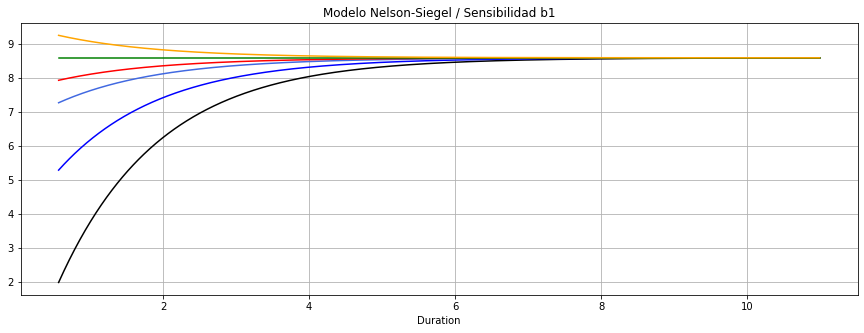

In [4]:
def NelsonSiegelForward(T,b0,b1,b2,t1):
    return b0 + (b1+b2*T) * np.exp(-T/t1)
           
def plotNelsonSiegel():
    xdata   = data.timeToMaturity
    ydata   = data.yieldSep17
    T       = np.linspace(min(xdata),max(xdata),num=1001,endpoint=True)
    
    plt.figure(figsize=(15,5))
    plt.title('Modelo Nelson-Siegel / Sensibilidad b1')
    plt.xlabel('Duration')
    plt.ylabel('')
    plt.grid()
    plt.plot(T,NelsonSiegelForward(T,b0=8.6, b1=-10,b2=0.0,t1=1.38),color='black'    ,label='b1=-10')
    plt.plot(T,NelsonSiegelForward(T,b0=8.6, b1=-5 ,b2=0.0,t1=1.38),color='blue'     ,label='b1=-5')
    plt.plot(T,NelsonSiegelForward(T,b0=8.6, b1=-2 ,b2=0.0,t1=1.38),color='royalblue',label='b1=-2')
    plt.plot(T,NelsonSiegelForward(T,b0=8.6, b1=-1 ,b2=0.0,t1=1.38),color='red'      ,label='b1=-1')
    plt.plot(T,NelsonSiegelForward(T,b0=8.6, b1=0  ,b2=0.0,t1=1.38),color='green'    ,label='b1= 0')
    plt.plot(T,NelsonSiegelForward(T,b0=8.6, b1=1  ,b2=0.0,t1=1.38),color='orange'   ,label='b1= 1')
    
def main():
    plotNelsonSiegel()
    
if __name__ == "__main__": 
    main()

#### Análisis $\beta_2$

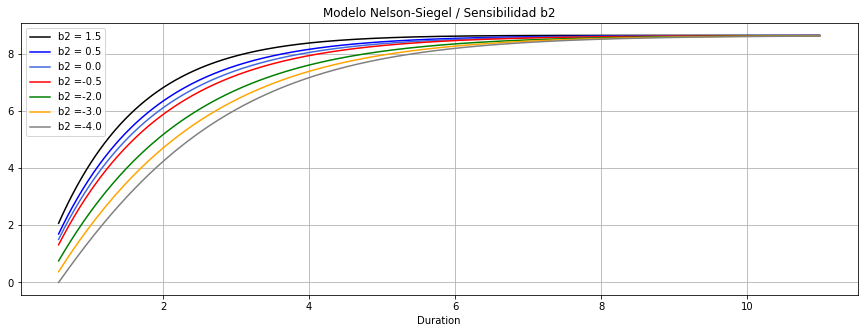

In [5]:
def NelsonSiegelForward(T,b0,b1,b2,t1):
    return b0 + (b1+b2*T) * np.exp(-T/t1)
           
def plotNelsonSiegel():
    xdata   = data.timeToMaturity
    ydata   = data.yieldSep17
    T       = np.linspace(min(xdata),max(xdata),num=1001,endpoint=True)
    b0      = 8.647282272026706
    b1      = -10.791382350846614
    
    plt.figure(figsize=(15,5))
    plt.title('Modelo Nelson-Siegel / Sensibilidad b2')
    plt.xlabel('Duration')
    plt.ylabel('')
    plt.grid()
    plt.plot(T,NelsonSiegelForward(T, b0, b1, b2= 1.5, t1=1.38),color='black'    ,label='b2 = 1.5')
    plt.plot(T,NelsonSiegelForward(T, b0, b1, b2= 0.5, t1=1.38),color='blue'     ,label='b2 = 0.5')
    plt.plot(T,NelsonSiegelForward(T, b0, b1, b2= 0.0, t1=1.38),color='royalblue',label='b2 = 0.0')
    plt.plot(T,NelsonSiegelForward(T, b0, b1, b2=-0.5, t1=1.38),color='red'      ,label='b2 =-0.5')
    plt.plot(T,NelsonSiegelForward(T, b0, b1, b2=-2.0, t1=1.38),color='green'    ,label='b2 =-2.0')
    plt.plot(T,NelsonSiegelForward(T, b0, b1, b2=-3.0, t1=1.38),color='orange'   ,label='b2 =-3.0')
    plt.plot(T,NelsonSiegelForward(T, b0, b1, b2=-4.0, t1=1.38),color='gray'     ,label='b2 =-4.0')
    plt.legend()
    
def main():
    plotNelsonSiegel()
    
if __name__ == "__main__": 
    main()

#### Análisis $\beta_3$
- Parámetro Hump

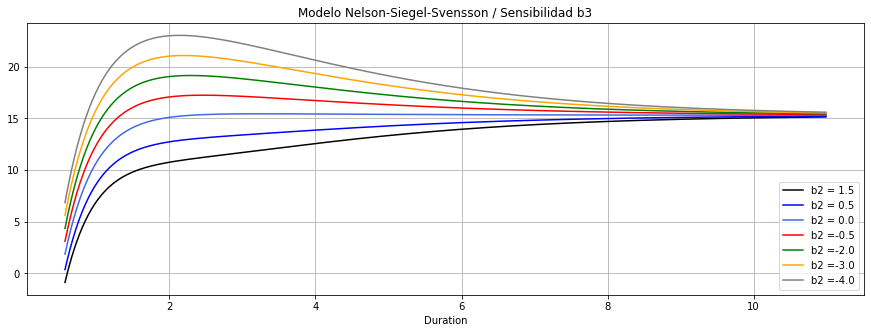

In [6]:
def NelsonSiegelSvenssonF(T,b0,b1,b2,b3,t1,t2):
    return b0 + (b1+b2*T) * np.exp(-T/t1) + b3*T*np.exp(-T/t2)
           
def plotNelsonSiegel():
    xdata   = data.timeToMaturity
    ydata   = data.yieldSep17
    T       = np.linspace(min(xdata),max(xdata),num=1001,endpoint=True)
    b0      = 15.3
    b1      = -54.0
    b2      = 10.3
    
    
    plt.figure(figsize=(15,5))
    plt.title('Modelo Nelson-Siegel-Svensson / Sensibilidad b3')
    plt.xlabel('Duration')
    plt.ylabel('')
    plt.grid()
    plt.plot(T,NelsonSiegelSvenssonF(T,b0,b1,b2,b3=-6.3,t1=0.45,t2=1.8),color='black'    ,label='b2 = 1.5')
    plt.plot(T,NelsonSiegelSvenssonF(T,b0,b1,b2,b3=-3.3,t1=0.45,t2=1.8),color='blue'     ,label='b2 = 0.5')
    plt.plot(T,NelsonSiegelSvenssonF(T,b0,b1,b2,b3=0.3 ,t1=0.45,t2=1.8),color='royalblue',label='b2 = 0.0')
    plt.plot(T,NelsonSiegelSvenssonF(T,b0,b1,b2,b3=3.3 ,t1=0.45,t2=1.8),color='red'      ,label='b2 =-0.5')
    plt.plot(T,NelsonSiegelSvenssonF(T,b0,b1,b2,b3=6.3 ,t1=0.45,t2=1.8),color='green'    ,label='b2 =-2.0')
    plt.plot(T,NelsonSiegelSvenssonF(T,b0,b1,b2,b3=9.3 ,t1=0.45,t2=1.8),color='orange'   ,label='b2 =-3.0')
    plt.plot(T,NelsonSiegelSvenssonF(T,b0,b1,b2,b3=12.3,t1=0.45,t2=1.8),color='gray'     ,label='b2 =-4.0')
    plt.legend()
    
def main():
    plotNelsonSiegel()
    
if __name__ == "__main__": 
    main()